In [17]:
import cdms2 as cdms
import MV2 as MV
import cdtime,cdutil,genutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import string
import glob
import scipy.stats as stats
# Local solution
# If running remotely, uncomment the following code:
# %%bash
# git clone https://github.com/katemarvel/CMIP5_tools
# import CMIP5_tools as cmip5
import sys,os
sys.path.append("/Users/kmarvel/Google Drive/python-utils")

import CMIP5_tools as cmip5
import DA_tools
import Plotting

from eofs.cdms import Eof
from eofs.multivariate.cdms import MultivariateEof
%matplotlib inline

In [35]:
def get_averages(region,variable,experiment):
    readstem="/Users/kmarvel/Documents/DATA/dester/regional_averages/"
   
   
   
    readdirec=readstem+region+"/"+variable+"/"+experiment+"/"

    fnames=glob.glob(readdirec+"*")
    nfiles=len(fnames)
    i=0
    fil=fnames[i]
    f=cdms.open(fil)
    data=f(variable)
    tax=data.getTime()
    ntime=len(tax)
    alldata=MV.zeros((nfiles,ntime))+1.e20
    alldata[i]=data
    for i in range(nfiles)[1:]:
        fil=fnames[i]
        f=cdms.open(fil)
        data=f(variable)
        if len(data.getTime())==ntime:
            alldata[i]=data
        f.close()
        
    alldata.setAxis(1,tax)    
    modax=cmip5.make_model_axis(fnames)
    alldata.setAxis(0,modax)
    return MV.masked_where(np.abs(alldata)>1.e10,alldata)

In [36]:
historical=get_averages("southwest","mrsos","historical")

In [37]:
ssp585=get_averages("southwest","mrsos","ssp585")

In [38]:
1032/12.+2014

2100.0

In [39]:
ssp370=get_averages("southwest","mrsos","ssp370")

In [42]:
def plot_jja(data):
    avg=MV.average(data,axis=0)
    cdutil.setTimeBoundsMonthly(avg)
    Plotting.time_plot(cdutil.JJA(avg)[1:])

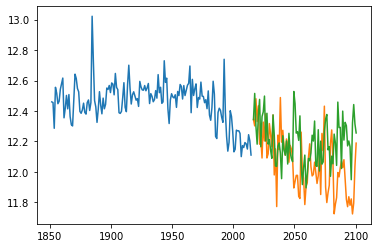

In [43]:
plot_jja(historical)
plot_jja(ssp585)
plot_jja(ssp370)

In [47]:
print(historical.shape)
print(ssp370.shape)

(150, 1980)
(50, 1032)


In [ ]:
#def concatenate_piControl():
readstem="/Users/kmarvel/Documents/DATA/dester/regional_averages/"
readdirec=readstem+region+"/"+variable+"/piControl/"
fnames=glob.glob(readdirec+"*")
    nfiles=len(fnames)
    i=0
    fil=fnames[i]
    f=cdms.open(fil)
    data=f(variable)
    tax=data.getTime()
    ntime=len(tax)
    alldata=MV.zeros((nfiles,ntime))
    alldata[i]=data
    for i in range(nfiles)[1:]:
        fil=fnames[i]
        f=cdms.open(fil)
        data=f(variable)[:ntime]
        alldata[i]=data
        f.close()
        
    alldata.setAxis(1,tax)    
    modax=cmip5.make_model_axis(fnames)
    alldata.setAxis(0,modax)
    return alldata